## 크롤링 사이트 연습문제 : 다음 뉴스

- 'https://news.daum.net' 에서
- (1) 메뉴의 섹션명과 링크 추출 추출해서
    - 데이터프레임으로 생성 후 daum_news_section.csv로 저장
    - section :홈, 기후환경, 사회, 경제 ....
    - link : https://news.daum.net/, https://news.daum.net/society, https://news.daum.net/politics, .....
    - 배열설명서는 추출하지 말 것

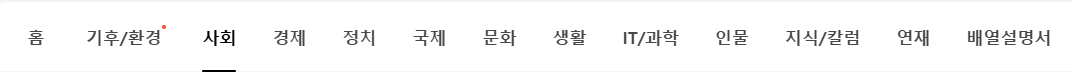

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
url = 'https://news.daum.net'
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")

In [22]:
lis = bs_obj.select_one(".flicking-camera").select("a")
lis
for li in lis :
    if  ("배열설명서" not in li.text) :
        print(li)

[<a aria-current="page" class="link_gnb" href="/news/home" role="menuitem"> <span class="txt_gnb">홈</span></a>,
 <a class="link_gnb" href="/news/climate" role="menuitem"> <span class="txt_gnb">기후/환경</span><span class="ir_pm ico_new" data-svelte-h="svelte-bn1hi7">새로운소식</span></a>,
 <a class="link_gnb" href="/news/society" role="menuitem"> <span class="txt_gnb">사회</span></a>,
 <a class="link_gnb" href="/news/economy" role="menuitem"> <span class="txt_gnb">경제</span></a>,
 <a class="link_gnb" href="/news/politics" role="menuitem"> <span class="txt_gnb">정치</span></a>,
 <a class="link_gnb" href="/news/world" role="menuitem"> <span class="txt_gnb">국제</span></a>,
 <a class="link_gnb" href="/news/culture" role="menuitem"> <span class="txt_gnb">문화</span></a>,
 <a class="link_gnb" href="/news/life" role="menuitem"> <span class="txt_gnb">생활</span></a>,
 <a class="link_gnb" href="/news/tech" role="menuitem"> <span class="txt_gnb">IT/과학</span></a>,
 <a class="link_gnb" href="/news/people" role="menu

<a aria-current="page" class="link_gnb" href="/news/home" role="menuitem"> <span class="txt_gnb">홈</span></a>
<a class="link_gnb" href="/news/climate" role="menuitem"> <span class="txt_gnb">기후/환경</span><span class="ir_pm ico_new" data-svelte-h="svelte-bn1hi7">새로운소식</span></a>
<a class="link_gnb" href="/news/society" role="menuitem"> <span class="txt_gnb">사회</span></a>
<a class="link_gnb" href="/news/economy" role="menuitem"> <span class="txt_gnb">경제</span></a>
<a class="link_gnb" href="/news/politics" role="menuitem"> <span class="txt_gnb">정치</span></a>
<a class="link_gnb" href="/news/world" role="menuitem"> <span class="txt_gnb">국제</span></a>
<a class="link_gnb" href="/news/culture" role="menuitem"> <span class="txt_gnb">문화</span></a>
<a class="link_gnb" href="/news/life" role="menuitem"> <span class="txt_gnb">생활</span></a>
<a class="link_gnb" href="/news/tech" role="menuitem"> <span class="txt_gnb">IT/과학</span></a>
<a class="link_gnb" href="/news/people" role="menuitem"> <span class=

In [25]:
lis = bs_obj.find("div", {"class":"flicking-camera"}).find_all("a", {"class":"link_gnb"})[:-1]
# lis = bs_obj.select_one(".flicking-camera").select("a")
# lis=bs_obj.select(".flicking-panel > a")[:-1]
menu=[]
link=[]
for li in lis:
    menu.append(li.text)
    link.append(url +"/"+ li["href"].split("/")[2])
len(menu), len(link)

(12, 12)

In [26]:
daum_news_df = pd.DataFrame({"menu":menu, "link":link})
daum_news_df

,menu,link
0,홈,https://news.daum.net/home
1,기후/환경새로운소식,https://news.daum.net/climate
2,사회,https://news.daum.net/society
3,경제,https://news.daum.net/economy
4,정치,https://news.daum.net/politics
5,국제,https://news.daum.net/world
6,문화,https://news.daum.net/culture
7,생활,https://news.daum.net/life
8,IT/과학,https://news.daum.net/tech
9,인물,https://news.daum.net/people


In [36]:
# daum_news_df.to_csv("./crawl_data/daum_news_df.csv", index=0, encoding="utf-8-sig")

In [27]:
df = pd.read_csv("./crawl_data/daum_news_df.csv")
df

,menu,link
0,홈,https://news.daum.net/home
1,기후/환경새로운소식,https://news.daum.net/climate
2,사회,https://news.daum.net/society
3,경제,https://news.daum.net/economy
4,정치,https://news.daum.net/politics
5,국제,https://news.daum.net/world
6,문화,https://news.daum.net/culture
7,생활,https://news.daum.net/life
8,IT/과학,https://news.daum.net/tech
9,인물,https://news.daum.net/people
